# Set environment

In [95]:
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.stats            import entropy

import pandas as pd
import os, glob
import re

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne   import _joint_probabilities

import seaborn as sns
import matplotlib.pyplot as plt

dat_dir = "/data/clintko/SMPK"

In [2]:
%matplotlib inline

# Read in the data

In [4]:
fnames = !ls /data/clintko/SMPK/ep8cs_dat_cal*
fnames

['/data/clintko/SMPK/ep8cs_dat_cal_prior05.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior06.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior07.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior08.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior09.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior10.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior11.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior12.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior13.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior14.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior15.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior20.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior25.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior30.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior35.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior40.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior45.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior50.txt']

In [96]:
glob.glob(os.path.join(dat_dir, "ep8cs_dat_cal_prior*"))

['/data/clintko/SMPK/ep8cs_dat_cal_prior05.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior06.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior07.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior08.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior09.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior10.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior11.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior12.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior13.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior14.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior15.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior20.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior25.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior30.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior35.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior40.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior45.txt',
 '/data/clintko/SMPK/ep8cs_dat_cal_prior50.txt']

# helper function for generating the similarities

In [81]:
def get_similarity(X, perplexity = 30, verbose = False):
    """calculate the similarity matrix Pi|j + Pj|i
    ref: https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
    """
    # Pairwise distances between all data points.
    D = pairwise_distances(X, squared=True)
    
    # Similarity with variable sigma.
    P = _joint_probabilities(D, perplexity, verbose)
    return P

def kl_div(P1, P2):
    """calculate KL divergence"""
    return entropy(P1.ravel(), P2.ravel())

def js_div(P1, P2):
    """calculate Jensen-Shannon Divergence"""
    return 0.5 * (kl_div(P1, P2) + kl_div(P2, P1))

# Raw t-SNE data

In [57]:
y_raw = pd.read_csv(
    os.path.join(dat_dir, "ep8cs_tsne_raw.txt"),
    header=None,
    names=["sample", "tsne1", "tsne2"],
    sep = "\t")

## Prior = 5

In [109]:
fnames = glob.glob(os.path.join(dat_dir, "ep8cs_dat_cal_prior*"))
[re.findall("prior(.*).txt", x) for x in fnames]

[['05'],
 ['06'],
 ['07'],
 ['08'],
 ['09'],
 ['10'],
 ['11'],
 ['12'],
 ['13'],
 ['14'],
 ['15'],
 ['20'],
 ['25'],
 ['30'],
 ['35'],
 ['40'],
 ['45'],
 ['50']]

In [71]:
prior = "05"
y_cal05 = pd.read_csv(
    os.path.join(dat_dir, "ep8cs_tsne_cal_prior" + prior + ".txt"),
    header=None,
    names=["sample", "cluster", "tsne1", "tsne2"],
    sep = "\t")

# calculate the similarities 
**using Sample1 and Sample2**

**Raw data**

In [73]:
y = y_raw
X_raw1 = y.loc[(y["sample"] == 1), ("tsne1", "tsne2")]
X_raw2 = y.loc[(y["sample"] == 2), ("tsne1", "tsne2")]

**Calibrated data**

In [74]:
y = y_cal05
X_cal1 = y.loc[(y["sample"] == 1), ("tsne1", "tsne2")]
X_cal2 = y.loc[(y["sample"] == 2), ("tsne1", "tsne2")]

**Check dimension**

In [77]:
print(X_raw1.shape)
print(X_raw2.shape)
print(X_cal1.shape)
print(X_cal2.shape)

(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)


**similarity**

In [82]:
%%time
P_raw1 = get_similarity(X_raw1)
P_raw2 = get_similarity(X_raw2)
P_cal1 = get_similarity(X_cal1)
P_cal2 = get_similarity(X_cal2)

CPU times: user 2min 46s, sys: 9.71 s, total: 2min 56s
Wall time: 2min 45s


In [87]:
%%time
div_raw   = js_div(squareform(P_raw1), squareform(P_raw2))
div_after = js_div(squareform(P_cal1), squareform(P_cal2))
div_cal1  = js_div(squareform(P_raw1), squareform(P_cal1))
div_cal2  = js_div(squareform(P_raw2), squareform(P_cal2))

CPU times: user 18.9 s, sys: 5.94 s, total: 24.9 s
Wall time: 24.9 s


In [92]:
print(div_raw)
print(div_after)
print(div_cal1)
print(div_cal2)

22.928072821978496
23.00765507774418
8.30796200856228
9.572316596847582


notice that I do not need to get the squared matrix to calcualte divergence

In [ ]:
%%time
div_raw   = js_div(P_raw1, P_raw2)
div_after = js_div(P_cal1, P_cal2)
div_cal1  = js_div(P_raw1, P_cal1)
div_cal2  = js_div(P_raw2, P_cal2)

In [84]:
print(div_raw)
print(div_after)
print(div_cal1)
print(div_cal2)

22.928072821978397
23.00765507774409
8.307962008562232
9.572316596847582


In [86]:
print(np.sum(P_raw1))
print(P_raw1.shape)

0.5000000106592931
(49995000,)


# design the script

plan: each file generated a matrix `18 x 49995000`

In [102]:
y_raw["sample"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])

In [154]:
def get_sample(dat, idx_sample):
    """get the sample from the data"""
    X = dat.loc[(dat["sample"] == idx_sample), ("tsne1", "tsne2")]
    return X.head(100)

def process_data(dat, idx_sample):
    """get a sample from data and get similarity"""
    print("    Sample:", idx_sample)
    X = get_sample(dat, idx_sample)
    P = get_similarity(X, perplexity = 30, verbose = False)
    return P

In [155]:
#mat = np.array([process_data(y, idx) for idx in range(1, 18+1)]).T
mat = np.array([process_data(y_raw, idx) for idx in range(1, 18+1)]).T
print("Check dimension:", mat.shape)
print(mat)

    Sample: 1
    Sample: 2
    Sample: 3
    Sample: 4
    Sample: 5
    Sample: 6
    Sample: 7
    Sample: 8
    Sample: 9
    Sample: 10
    Sample: 11
    Sample: 12
    Sample: 13
    Sample: 14
    Sample: 15
    Sample: 16
    Sample: 17
    Sample: 18
Check dimension: (4950, 18)
[[4.74116201e-09 4.62523957e-06 2.98340974e-07 ... 1.01277501e-05
  6.93357623e-05 2.09638147e-04]
 [1.87644649e-05 1.01336627e-06 1.68971617e-07 ... 9.03843370e-06
  4.88545944e-06 3.36034873e-06]
 [5.07845565e-04 2.92985650e-05 8.66090109e-06 ... 6.06459320e-06
  3.46580887e-09 4.38045181e-04]
 ...
 [8.70034271e-05 1.53128149e-04 3.72553669e-05 ... 3.87655721e-06
  1.74368563e-05 4.29359292e-07]
 [5.82500019e-05 1.37648156e-06 1.73342678e-04 ... 2.60152813e-04
  3.63272115e-05 9.19092346e-06]
 [6.47135992e-04 2.27301933e-08 9.14349412e-06 ... 1.22639679e-04
  9.27735007e-05 4.79975145e-09]]


In [122]:
mat = np.array([test(y_raw, idx) for idx in range(1, 19)])

ValueError: cannot copy sequence with size 5 to array axis with dimension 2

In [116]:
mat = np.empty(5)
test(y_raw, 2)

,tsne1,tsne2
10000,10.740033,-15.140380
10001,-2.968976,4.073344
10002,-9.825284,3.050411
10003,-7.211396,-17.826702
10004,-13.362154,-12.046859


In [ ]:
X = y_raw.loc[:, ["tsne1", "tsne2"]].head(100)

In [38]:
X = y_raw.loc[:, ["tsne1", "tsne2"]].head(100)
P = get_similarity(X)
P_sym = squareform(P)

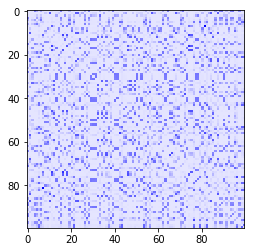

In [39]:
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(P_sym, interpolation='none', cmap=pal)

In [34]:
fname = os.path.join(dat_dir, "ep8cs_tsne_raw_similarity.npy")
fname

'/data/clintko/SMPK/ep8cs_tsne_raw_similarity.npy'

In [ ]:
np.save("", P_binary)

In [41]:
X = y_raw.loc[:, ["tsne1", "tsne2"]].head(100)
P = get_similarity(X)
P_sym2 = squareform(P)

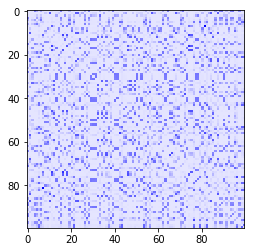

In [42]:
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(P_sym2, interpolation='none', cmap=pal)

In [49]:
squareform([1,2,3])

array([[0, 1, 2],
       [1, 0, 3],
       [2, 3, 0]])

In [48]:
P.shape

(4950,)

In [44]:
P_sym * (np.log(P_sym) - np.log(P_sym2)) #+ P_sym2 * np.log(P_sym2 / P_sym)

/local_data/env-py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/local_data/env-py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


array([[nan,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., nan,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., nan, ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., nan,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., nan]])

In [8]:
y_raw.head()

,sample,tsne1,tsne2
0,1.0,-18.683454,5.300567
1,1.0,18.398529,6.118176
2,1.0,-3.461957,13.952374
3,1.0,-17.099855,6.364835
4,1.0,-11.418336,5.993404


In [8]:
y_cal.head()

,sample,cluster,tsne1,tsne2
0,1.0,3.0,-17.887501,4.354687
1,1.0,5.0,14.683408,5.222981
2,1.0,4.0,-5.047520,15.896918
3,1.0,3.0,-19.548543,5.687037
4,1.0,3.0,-12.300324,0.664771


In [9]:
df = y_raw
df = df.loc[df["sample"] == 1, ["tsne1", "tsne2"]]
df.shape

(10000, 2)

```
MACHINE_EPSILON = np.finfo(np.double).eps

distances = D.astype(np.float32, copy=False)
conditional_P = _utils._binary_search_perplexity(
        distances, None, desired_perplexity, verbose)
P = conditional_P + conditional_P.T
sum_P = np.maximum(np.sum(P), MACHINE_EPSILON)
P = np.maximum(squareform(P) / sum_P, MACHINE_EPSILON)
```

In [10]:
# Pairwise distances between all data points.
%time D = pairwise_distances(df)
# Similarity with variable sigma.
%time P_binary = _joint_probabilities(D, 30., False)
# The output of this function needs to be reshaped to a square matrix.
P_binary_s11 = squareform(P_binary)

CPU times: user 1.39 s, sys: 1.32 s, total: 2.71 s
Wall time: 1.25 s
CPU times: user 51.4 s, sys: 792 ms, total: 52.2 s
Wall time: 52.2 s


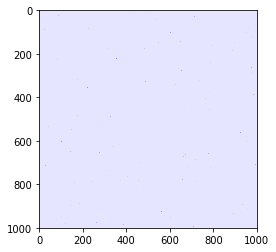

In [11]:
plt.figure(figsize=(4, 4))
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(P_binary_s[::10, ::10], interpolation='none', cmap=pal)

In [12]:
df = y_cal
df = df.loc[df["sample"] == 1, ["tsne1", "tsne2"]]
df.shape

(10000, 2)

In [13]:
# Pairwise distances between all data points.
%time D = pairwise_distances(df)
# Similarity with variable sigma.
%time P_binary = _joint_probabilities(D, 30., False)
# The output of this function needs to be reshaped to a square matrix.
P_binary_s12 = squareform(P_binary)

CPU times: user 1.67 s, sys: 1.28 s, total: 2.95 s
Wall time: 1.43 s
CPU times: user 53.5 s, sys: 897 ms, total: 54.4 s
Wall time: 54.3 s


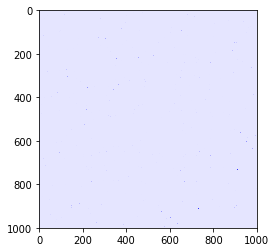

In [14]:
plt.figure(figsize=(4, 4))
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(P_binary_s12[::10, ::10], interpolation='none', cmap=pal)

In [ ]:
_kl_divergence